# **Apartment for Rent Classified**

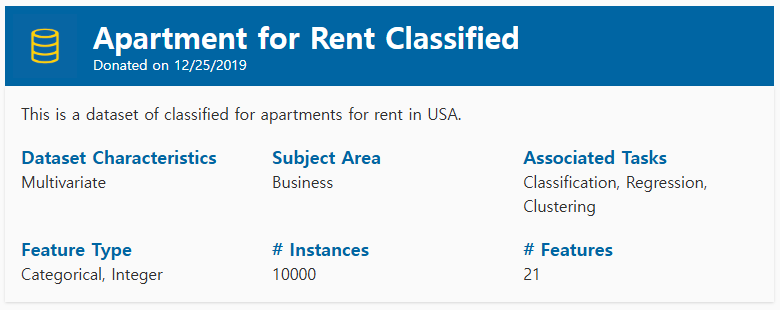

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
apartments_df = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=';', encoding='ISO-8859-1')

C:\Users\cailab\AppData\Local\Temp\ipykernel_1840\3359099565.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  apartments_df = pd.read_csv('apartments_for_rent_classified_100K.csv', sep=';', encoding='ISO-8859-1')


### **1. EDA, 전처리, Feature Engineering**

In [73]:
apartments_df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


In [74]:
apartments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

Null이 존재하는 피쳐들이 있음. 추가적인 feature를 만든 이후에 일괄적으로 제거

In [75]:
apartments_df["currency"].value_counts()

currency
USD    99492
Name: count, dtype: int64

currency는 모두 일관적으로 USD이므로 지워도 무방

In [76]:
apartments_df["id"].value_counts()

id
5508802531    2
5197864265    2
5197858885    2
5197859052    2
5197859695    2
             ..
5508930359    1
5508930563    1
5508930632    1
5508934954    1
5121218844    1
Name: count, Length: 99408, dtype: int64

같은 아이디의 중복값이 존재

In [77]:
apartments_df[apartments_df["id"] == 5508802531]
# 중복된 아이디의 데이터 확인

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
41952,5508802531,housing/rent/apartment,Prominence Apartments One BR Luxury Apartment ...,We are a tranquil apartment community located ...,"Gym,Playground,Pool,Tennis,Washer Dryer",1.0,1.0,USD,No,Yes,...,$670,Monthly,703,NaN,Greensboro,NC,36.0909,-79.9272,RentDigs.com,1568753758
41996,5508802531,housing/rent/apartment,Prominence Apartments One BR Luxury Apartment ...,We are a tranquil apartment community located ...,"Gym,Playground,Pool,Tennis,Washer Dryer",1.0,1.0,USD,No,Yes,...,$670,Monthly,703,NaN,Greensboro,NC,36.0909,-79.9272,RentDigs.com,1568753758


In [78]:
apartments_df = apartments_df.drop_duplicates(subset="id", keep="first")

중복된 아이디의 데이터 처리

In [79]:
apartments_df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,5121219946,housing/rent/apartment,Houston - superb Apartment nearby fine dining,"Redefining urban living, in southeast Houston,...","Gym,Parking,Patio/Deck,Playground,Storage,Wood...",1.0,1.0,USD,No,Yes,...,$780,Monthly,605,NaN,Houston,TX,29.6151,-95.1998,RentDigs.com,1544185770
99488,5121219696,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,Courtney Manor Apartments offer the best of ev...,"AC,Cable or Satellite,Clubhouse,Dishwasher,Gym...",2.0,2.0,USD,No,Yes,...,$813,Monthly,921,NaN,Jacksonville,FL,30.2254,-81.7579,RentDigs.com,1544185750
99489,5121219420,housing/rent/apartment,A great & large One BR apartment. Pet OK!,"Fully remodeled, new floor, kitchen cabinet, s...","Garbage Disposal,Refrigerator",1.0,1.0,USD,No,Yes,...,"$1,325",Monthly,650,NaN,San Diego,CA,32.7379,-117.0914,RentDigs.com,1544185729
99490,5121218935,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...","Amenities include a fitness facilities, swimmi...","Gym,Pool",1.0,1.0,USD,No,Yes,...,$931,Monthly,701,NaN,Huntersville,NC,35.4158,-80.8451,RentDigs.com,1544185670


In [80]:
apartments_df['fee'].value_counts(dropna=False)

fee
No     99207
Yes      201
Name: count, dtype: int64

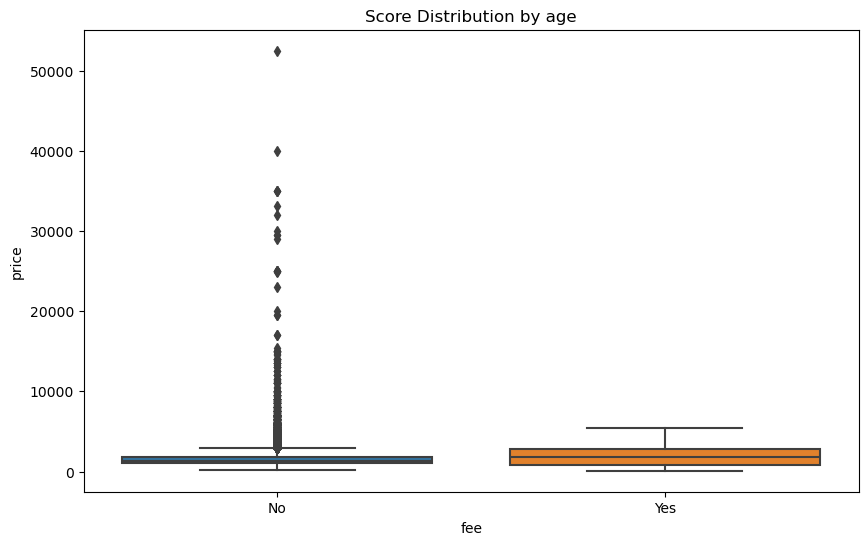

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=apartments_df, x='fee', y='price')
plt.title("Score Distribution by age")
plt.show()

fee는 유의미한 피쳐로 보이지 않음

In [82]:
apartments_df['category'].value_counts()

category
housing/rent/apartment            99347
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/home                     4
housing/rent/short_term               4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64

apartment가 대부분

In [83]:
apartments_df['currency'].value_counts()

currency
USD    99408
Name: count, dtype: int64

USD로 동일하여 예측에 의미 없음

In [84]:
apartments_df = apartments_df.drop(["amenities", "category", "title", "body", "currency", "has_photo", "latitude", "longitude",
                                    "source", "address", "time", 'price_display','price_type','id', 'fee'], axis=1)

쓸모없는 object 피쳐는 제거

In [85]:
apartments_df['pets_allowed'].value_counts()

pets_allowed
Cats,Dogs         37066
Cats               1840
Dogs                127
Cats,Dogs,None        1
Name: count, dtype: int64

In [86]:
apartments_df['pets_allowed'] = np.where(apartments_df['pets_allowed'].isna(), 0, 1)

동물이 허가된 경우는 1로 하고 그렇지 않으면 0으로 맵핑

In [87]:
apartments_df

,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state
0,1.0,1.0,1,2195.0,542,Redondo Beach,CA
1,1.5,3.0,1,1250.0,1500,Newport News,VA
2,2.0,3.0,0,1395.0,1650,Raleigh,NC
3,1.0,2.0,1,1600.0,820,Vacaville,CA
4,1.0,1.0,1,975.0,624,Albuquerque,NM
...,...,...,...,...,...,...,...
99487,1.0,1.0,0,780.0,605,Houston,TX
99488,2.0,2.0,1,813.0,921,Jacksonville,FL
99489,1.0,1.0,1,1325.0,650,San Diego,CA
99490,1.0,1.0,1,931.0,701,Huntersville,NC


In [88]:
apartments_df['cityname'].value_counts()

cityname
Dallas          2856
Denver          2750
Los Angeles     2429
Las Vegas       1846
Arlington       1577
                ... 
Flomaton           1
Murphysboro        1
Highwood           1
Del Mar            1
Willow Grove       1
Name: count, Length: 2979, dtype: int64

도시별로 분명 집값이 다르기 때문에 이를 반영할 도시별 평균 집값과 그 분산을 새로운 feature로 추가

In [89]:
# 각 도시 이름의 개수 계산
city_counts = apartments_df['cityname'].value_counts()

# 10번 미만으로 등장한 도시는 other로 분류
apartments_df['cityname'] = apartments_df['cityname'].where(apartments_df['cityname'].map(city_counts) > 10, 'other')

In [90]:
apartments_df['cityname'].value_counts()

cityname
other          6281
Dallas         2856
Denver         2750
Los Angeles    2429
Las Vegas      1846
               ... 
Sewickley        11
Rural Hall       11
Pittsfield       11
Hopewell         11
San Mateo        11
Name: count, Length: 1004, dtype: int64

6281개의 데이터가 'other'로 분류되었음

In [91]:
# 각 도시 이름별로 price의 평균, 분산을 계산하여 새로운 피처에 추가
apartments_df['average_price_by_city'] = apartments_df.groupby('cityname')['price'].transform('mean')

apartments_df['var_price_by_city'] = apartments_df.groupby('cityname')['price'].transform('var')

In [92]:
apartments_df['state'].value_counts()

state
TX    11250
CA    10301
VA     8278
NC     6293
CO     6279
FL     5773
MD     5276
MA     5023
OH     4899
GA     4750
NJ     4444
NV     2813
WA     2595
AZ     2376
LA     1345
MO     1203
PA     1122
TN     1114
IL     1036
NE     1020
KY      995
OK      934
SC      908
KS      899
UT      809
ND      743
NH      735
MI      710
NY      659
AR      598
MN      581
CT      509
IN      509
WI      430
IA      372
AL      354
OR      277
VT      125
RI      119
MS      107
ID       96
DC       93
MT       87
SD       86
AK       58
ME       32
HI       31
NM       24
WY       16
WV       13
DE        7
Name: count, dtype: int64

In [93]:
# 각 주의 개수 계산
state_counts = apartments_df['cityname'].value_counts()

# 10번 미만으로 등장한 주는 other로 분류
apartments_df['state'] = apartments_df['state'].where(apartments_df['state'].map(state_counts) > 10, 'other')

In [94]:
# 각 주별로 price의 평균과 분산을 계산하여 새로운 피처에 추가
apartments_df['average_price_by_state'] = apartments_df.groupby('state')['price'].transform('mean')

apartments_df['var_price_by_state'] = apartments_df.groupby('state')['price'].transform('var')

In [95]:
apartments_df = apartments_df.drop(["cityname"], axis=1)

In [96]:
# bathrooms와 bedrooms을 합쳐서 total_rooms 피처 생성
apartments_df['total_rooms'] = apartments_df['bathrooms'] + apartments_df['bedrooms']

# 방당 평균 면적을 나타내는 average_area_per_room 피처 생성
apartments_df['average_area_per_room'] = apartments_df['square_feet'] / apartments_df['total_rooms']

In [97]:
apartments_df['average_area_per_room'].describe()

count    99222.000000
mean       314.287742
std        100.124271
min        100.000000
25%        262.500000
50%        300.000000
75%        361.500000
max      12000.000000
Name: average_area_per_room, dtype: float64

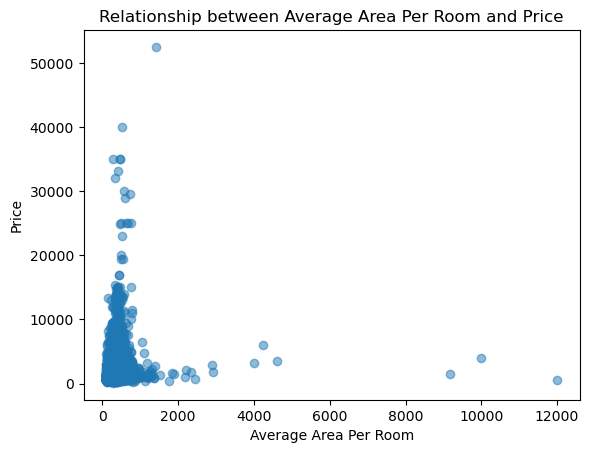

In [98]:
plt.scatter(apartments_df['average_area_per_room'], apartments_df['price'], alpha=0.5)
plt.xlabel('Average Area Per Room')
plt.ylabel('Price')
plt.title('Relationship between Average Area Per Room and Price')
plt.show()

In [99]:
apartments_df['total_rooms'].describe()

count    99222.000000
mean         3.174215
std          1.190566
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         15.000000
Name: total_rooms, dtype: float64

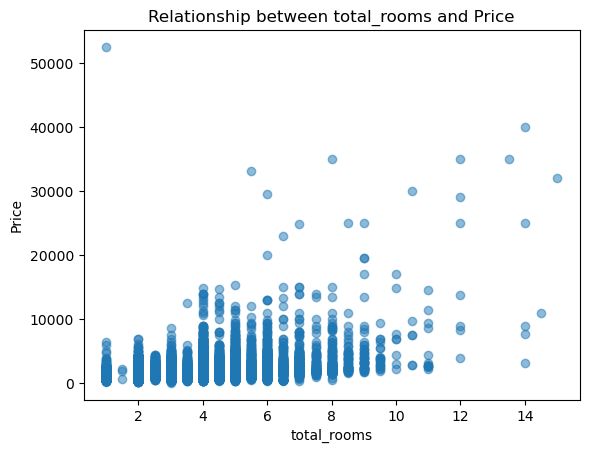

In [100]:
plt.scatter(apartments_df['total_rooms'], apartments_df['price'], alpha=0.5)
plt.xlabel('total_rooms')
plt.ylabel('Price')
plt.title('Relationship between total_rooms and Price')
plt.show()

'average_area_per_room' 과 'total_rooms' 모두 price와의 산점도상으로는 그다지 유의미 해보이지는 않음

In [101]:
apartments_df

,bathrooms,bedrooms,pets_allowed,price,square_feet,state,average_price_by_city,var_price_by_city,average_price_by_state,var_price_by_state,total_rooms,average_area_per_room
0,1.0,1.0,1,2195.0,542,other,2790.870130,761045.772386,1527.076403,817890.347859,2.0,271.000000
1,1.5,3.0,1,1250.0,1500,other,1079.133484,92034.487811,1527.076403,817890.347859,4.5,333.333333
2,2.0,3.0,0,1395.0,1650,other,1243.326012,122519.743130,1527.076403,817890.347859,5.0,330.000000
3,1.0,2.0,1,1600.0,820,other,1906.435897,73439.410256,1527.076403,817890.347859,3.0,273.333333
4,1.0,1.0,1,975.0,624,other,975.923077,110530.743590,1527.076403,817890.347859,2.0,312.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
99487,1.0,1.0,0,780.0,605,other,1090.185135,152059.785706,1527.076403,817890.347859,2.0,302.500000
99488,2.0,2.0,1,813.0,921,other,1152.475884,218515.288933,1527.076403,817890.347859,4.0,230.250000
99489,1.0,1.0,1,1325.0,650,other,2377.001256,426218.023898,1527.076403,817890.347859,2.0,325.000000
99490,1.0,1.0,1,931.0,701,other,1354.746667,103311.597117,1527.076403,817890.347859,2.0,350.500000


In [102]:
print(apartments_df.isna().sum())

bathrooms                  63
bedrooms                  124
pets_allowed                0
price                       1
square_feet                 0
state                       0
average_price_by_city       0
var_price_by_city           0
average_price_by_state      0
var_price_by_state          0
total_rooms               186
average_area_per_room     186
dtype: int64


In [103]:
apartments_df = apartments_df.dropna()

In [104]:
print(apartments_df.isna().sum())

bathrooms                 0
bedrooms                  0
pets_allowed              0
price                     0
square_feet               0
state                     0
average_price_by_city     0
var_price_by_city         0
average_price_by_state    0
var_price_by_state        0
total_rooms               0
average_area_per_room     0
dtype: int64


0값이 있어서 생기는 요소는 모두 데이터째로 제거

In [105]:
apartments_df['price'].describe()

count    99221.000000
mean      1527.252194
std        899.806447
min        100.000000
25%       1014.000000
50%       1350.000000
75%       1795.000000
max      52500.000000
Name: price, dtype: float64

<Axes: >

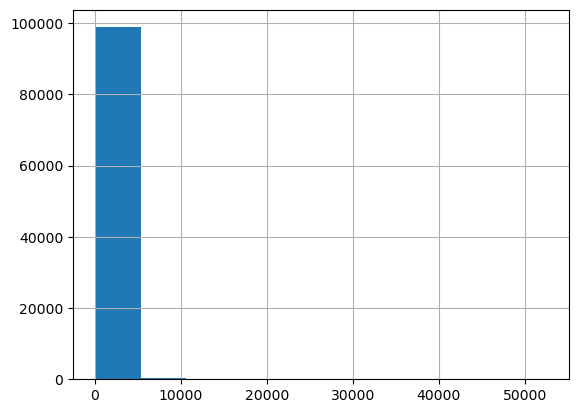

In [106]:
apartments_df['price'].hist()

집값이 비싼 이상치가 많음

In [107]:
# 이상치 제거
lower_bound = apartments_df['price'].quantile(0.1)
upper_bound = apartments_df['price'].quantile(0.85)

apartments_df = apartments_df[(apartments_df['price'] >= lower_bound) & (apartments_df['price'] <= upper_bound)]

In [108]:
apartments_df['price'].describe()

count    74554.000000
mean      1352.687797
std        343.439493
min        800.000000
25%       1069.000000
50%       1319.000000
75%       1600.000000
max       2142.000000
Name: price, dtype: float64

<Axes: >

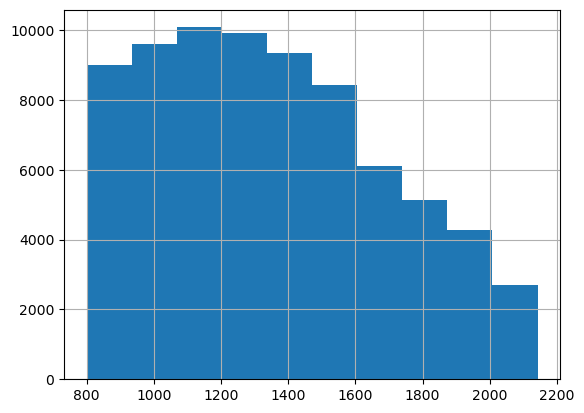

In [109]:
apartments_df['price'].hist()

### **Feature Engineering 요약**

id - 제거  
category - 제거  
title - 제거  
body - 제거  
amenities - 제거  
bathrooms - 사용  
bedrooms - 사용 (방의 갯수를 더해 총 방의 갯수 사용)  
currency - 제거  
fee - 제거  
has_photo - 제거  
pets_allowed - 이진화하여 사용  
price_display - 제거  
price_type - 제거  
square_feet - 사용 (방의 평균면적 추가)  
address - 제거  
cityname - 도시별 평균 집값과 분산 추가  
state - 주별 평균 집값과 분산 추가  
latitude - 제거  
longitude - 제거  
source -제거  
time - 제거  

### **선형회귀 모델 구축, 예측, 평가**

In [110]:
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = apartments_df[['var_price_by_city', 'pets_allowed','total_rooms','square_feet', 'average_price_by_city', 'average_price_by_state','var_price_by_state','bathrooms', 'bedrooms','average_area_per_room']]
y = apartments_df['price']

# 데이터 준비 및 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Statsmodels를 사용하여 p-value와 adj. R², F-test 등의 정보 확인
X_train_const = sm.add_constant(X_train_scaled)  # 절편 추가
model_sm = sm.OLS(y_train, X_train_const).fit()

# 모델 요약
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     6936.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:38:48   Log-Likelihood:            -4.1517e+05
No. Observations:               59643   AIC:                         8.304e+05
Df Residuals:                   59635   BIC:                         8.304e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -71.1978      1.200    -59.346      0.0

In [111]:
# 예측 수행 (log 스케일)
y_pred = model_sm.predict(sm.add_constant(X_test_scaled))

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (original scale):", mse)
print("Mean Absolute Error (original scale):", mae)

Mean Squared Error (original scale): 67287.30143358794
Mean Absolute Error (original scale): 199.75973952613631


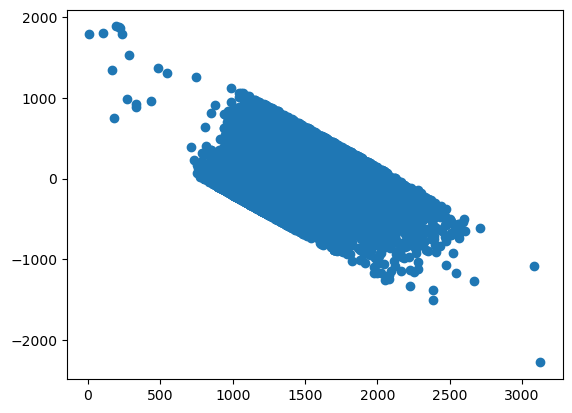

In [112]:
# y 예측값과 잔차간의 관계
plt.scatter(model_sm.fittedvalues, model_sm.resid)

((array([-4.23121663, -4.02730977, -3.91621153, ...,  3.91621153,
          4.02730977,  4.23121663]),
  array([-2275.55712891, -1496.59277344, -1381.65625   , ...,
          1865.63134766,  1877.90673828,  1881.18066406])),
 (253.72427690005335, -0.06354914180790813, 0.9941894911278619))

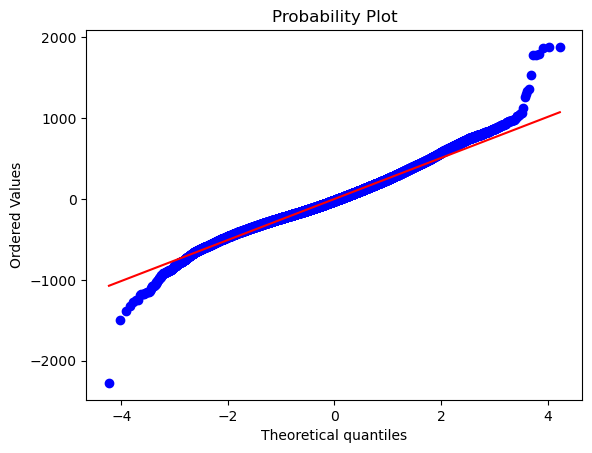

In [113]:
import scipy.stats as stats
import pylab
# QQ plot 기반의 데이터 정상성 확인
stats.probplot(model_sm.resid, dist='norm', plot=pylab)

In [114]:
# VIF Score 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)

                  feature        VIF
0       var_price_by_city   1.275767
1            pets_allowed   1.004061
2             total_rooms        inf
3             square_feet  10.483510
4   average_price_by_city   1.331968
5  average_price_by_state   1.014178
6      var_price_by_state        NaN
7               bathrooms        inf
8                bedrooms        inf
9   average_area_per_room   5.498565


C:\Users\cailab\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\cailab\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


### **Lasso, Ridge, Elasticnet**

In [115]:
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso

# lasso
lasso = Lasso(alpha=1, random_state=42, max_iter=100000)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)
print("\n")

# Ridge
ridge = Ridge(alpha=1, random_state=42, max_iter=100000)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge")
print("Mean Squared Error (MSE):", mse_ridge)
print("Mean Absolute Error (MAE):", mae_ridge)
print("R-squared (R²):", r2_ridge)
print("\n")

# ElasticNet
elasticnet = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42, max_iter=100000)
elasticnet.fit(X_train_scaled, y_train)
y_pred_elasticnet = elasticnet.predict(X_test_scaled)

mse_elasticnet = mean_squared_error(y_test, y_pred_elasticnet)
mae_elasticnet = mean_absolute_error(y_test, y_pred_elasticnet)
r2_elasticnet = r2_score(y_test, y_pred_elasticnet)

print("ElasticNet")
print("Mean Squared Error (MSE):", mse_elasticnet)
print("Mean Absolute Error (MAE):", mae_elasticnet)
print("R-squared (R²):", r2_elasticnet)

Lasso
Mean Squared Error (MSE): 66698.36244354265
Mean Absolute Error (MAE): 200.08445929740853
R-squared (R²): 0.4307383945954272


Ridge
Mean Squared Error (MSE): 67237.56519237571
Mean Absolute Error (MAE): 199.7554551113367
R-squared (R²): 0.42613637122942505


ElasticNet
Mean Squared Error (MSE): 74676.2126712906
Mean Absolute Error (MAE): 222.79200757687528
R-squared (R²): 0.36264850959758765
